In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
import os
import joblib

In [5]:
base_path = "/home/satyukt/Sarthak/Escorts_Kubota_task"
df = pd.read_csv(f"{base_path}/csv/train_1.csv")

In [6]:
df.head()

,Year,Season,total_Rainfall,Wind Speed,Temperature (°C),NDVI,LST,rsm,Relative Humidity,Yield (Tonnes/Hectare)
0,1999,Kharif,386.0,3.597843,22.319869,0.228613,33.133940,0.37564,94.678497,3.145154
1,1999-00,Rabi,298.0,1.916522,21.764293,0.313396,36.131505,0.37564,97.630815,2.131488
2,2000,Kharif,482.0,3.500850,22.065163,0.279665,33.133940,0.37564,95.881373,2.891524
3,2000-01,Rabi,182.0,1.947377,21.833989,0.422297,32.133325,0.37564,97.462951,2.133333
4,2001,Kharif,462.0,3.695098,22.253268,0.166549,33.133940,0.37564,95.042745,3.062620


In [7]:
X = df.drop(columns=["Yield (Tonnes/Hectare)", "Year"], axis=1)

In [8]:
y = df["Yield (Tonnes/Hectare)"]

In [9]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preproccessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [10]:
X = preproccessor.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((30, 9), (8, 9))

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_sqaure = r2_score(true, predicted)
    return mae, rmse, r2_sqaure

In [13]:
models = {
    "Linear Regression" : LinearRegression(),
     "Lasso" : Lasso(),
     "Ridge" : Ridge(),
     "KNeighborsRegressor" : KNeighborsRegressor(),
     "DecisionTreeRegressor" : DecisionTreeRegressor(),
     "XGBRFRegressor" : XGBRFRegressor(),
     "CatBoostRegressor" : CatBoostRegressor(),
     "AdaBoostRegressor" : AdaBoostRegressor(),
     "RandomForestRegressor" : RandomForestRegressor()
}

In [14]:
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print("model performance, Training set")
    print(f"R mean square error: {model_train_rmse}")
    print("Mean absoulute error: {:4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))
    r2_list.append(model_test_r2)
    
    print("--------------------------------------")
    
    print("model performance, Testing set")
    print(f"R mean square error: {model_test_rmse}")
    print("Mean absoulute error: {:4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    
    print("========================================")

Linear Regression
model performance, Training set
R mean square error: 0.4281539056805099
Mean absoulute error: 0.370397
- R2 score: 0.3664
--------------------------------------
model performance, Testing set
R mean square error: 0.44532705216573876
Mean absoulute error: 0.416882
- R2 score: -0.1697
Lasso
model performance, Training set
R mean square error: 0.5378810131470033
Mean absoulute error: 0.404900
- R2 score: 0.0000
--------------------------------------
model performance, Testing set
R mean square error: 0.4312548950275764
Mean absoulute error: 0.337516
- R2 score: -0.0969
Ridge
model performance, Training set
R mean square error: 0.45786500036802824
Mean absoulute error: 0.375640
- R2 score: 0.2754
--------------------------------------
model performance, Testing set
R mean square error: 0.4415034583203645
Mean absoulute error: 0.402375
- R2 score: -0.1497
KNeighborsRegressor
model performance, Training set
R mean square error: 0.4492952353495907
Mean absoulute error: 0.334

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
7,AdaBoostRegressor,0.358246
8,RandomForestRegressor,0.172835
6,CatBoostRegressor,0.060466
5,XGBRFRegressor,0.033785
3,KNeighborsRegressor,0.018060
1,Lasso,-0.096936
2,Ridge,-0.149691
0,Linear Regression,-0.169691
4,DecisionTreeRegressor,-0.367292


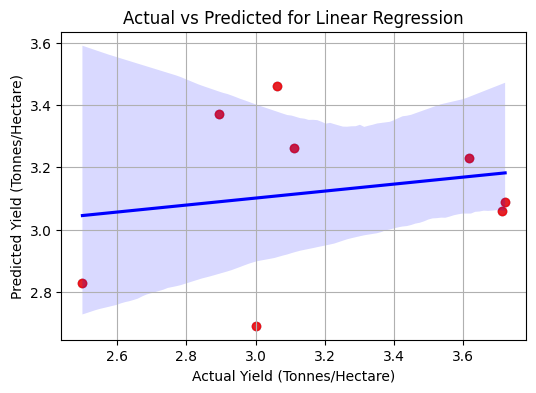

Linear Regression model saved as 'Linear_Regression_model.pkl'.


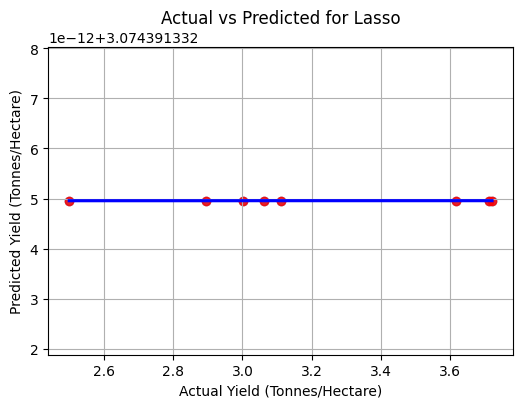

Lasso model saved as 'Lasso_model.pkl'.


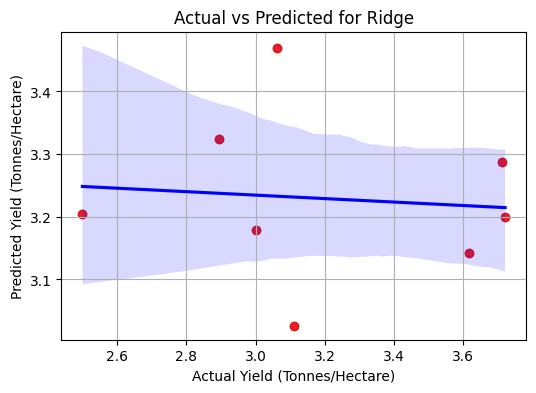

Ridge model saved as 'Ridge_model.pkl'.


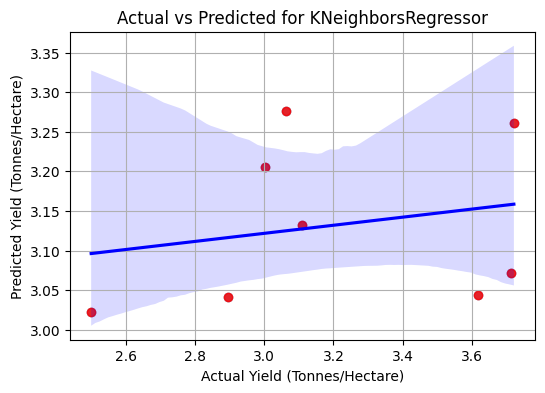

KNeighborsRegressor model saved as 'KNeighborsRegressor_model.pkl'.


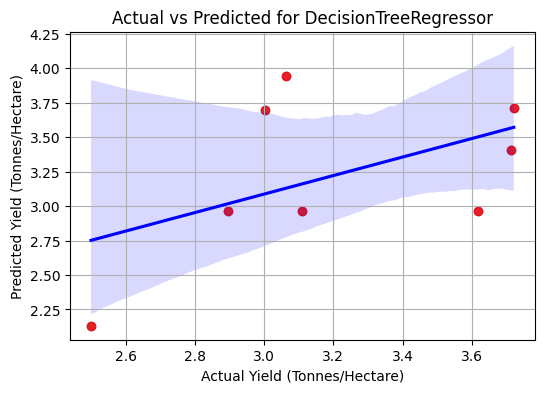

DecisionTreeRegressor model saved as 'DecisionTreeRegressor_model.pkl'.


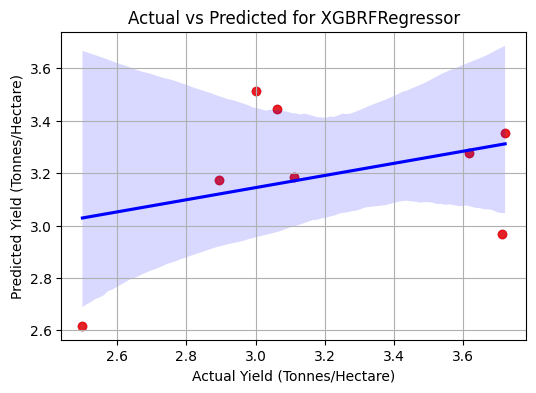

XGBRFRegressor model saved as 'XGBRFRegressor_model.pkl'.
Learning rate set to 0.023527
0:	learn: 0.5344405	total: 387us	remaining: 387ms
1:	learn: 0.5313177	total: 731us	remaining: 365ms
2:	learn: 0.5282628	total: 1ms	remaining: 334ms
3:	learn: 0.5247781	total: 1.31ms	remaining: 325ms
4:	learn: 0.5211216	total: 1.66ms	remaining: 331ms
5:	learn: 0.5191017	total: 1.91ms	remaining: 316ms
6:	learn: 0.5159536	total: 2.21ms	remaining: 313ms
7:	learn: 0.5138607	total: 2.5ms	remaining: 311ms
8:	learn: 0.5111719	total: 2.89ms	remaining: 319ms
9:	learn: 0.5077607	total: 3.26ms	remaining: 323ms
10:	learn: 0.5050988	total: 3.56ms	remaining: 320ms
11:	learn: 0.5009044	total: 3.84ms	remaining: 316ms
12:	learn: 0.4982455	total: 4.14ms	remaining: 314ms
13:	learn: 0.4955194	total: 4.49ms	remaining: 316ms
14:	learn: 0.4923930	total: 4.69ms	remaining: 308ms
15:	learn: 0.4900859	total: 5ms	remaining: 308ms
16:	learn: 0.4885341	total: 5.28ms	remaining: 305ms
17:	learn: 0.4861529	total: 5.63ms	remaining: 3

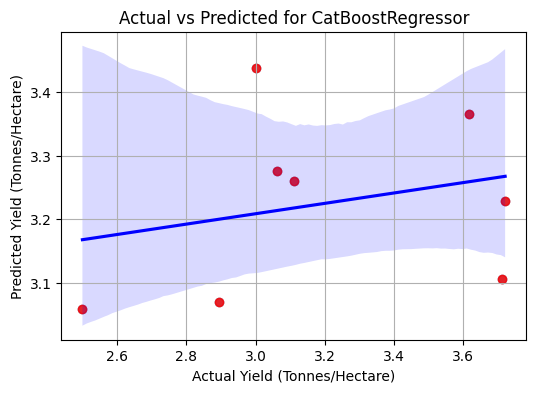

CatBoostRegressor model saved as 'CatBoostRegressor_model.pkl'.


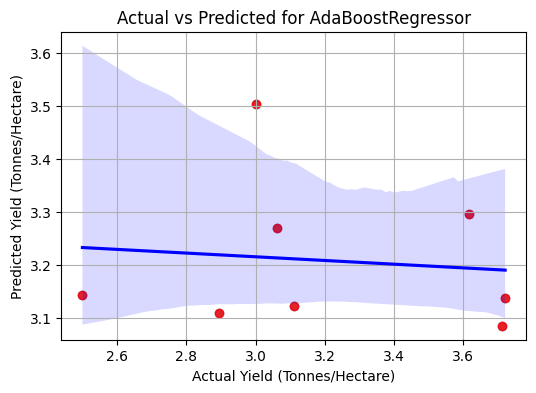

AdaBoostRegressor model saved as 'AdaBoostRegressor_model.pkl'.


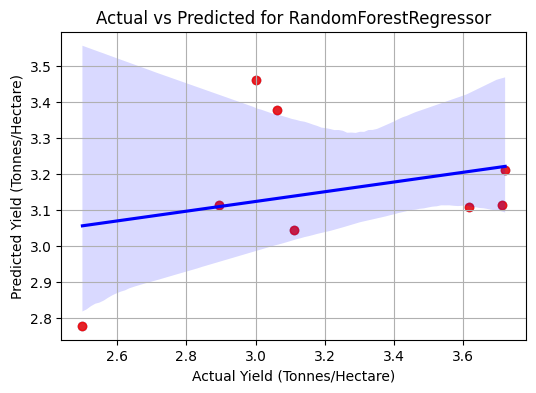

RandomForestRegressor model saved as 'RandomForestRegressor_model.pkl'.


In [16]:
model_out_path = f"{base_path}/models"
result_png_path = f"{base_path}/results_png"
os.makedirs(result_png_path, exist_ok=True)
os.makedirs(model_out_path, exist_ok=True)
all_predictions = []
model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_test_r2 = r2_score(y_test, y_test_pred)
    r2_list.append(model_test_r2)
    
    pred_df = pd.DataFrame({
        "Model": model_name,
        "Actual": y_test,
        "Predict": y_test_pred,
        "Difference": y_test - y_test_pred
    })
    all_predictions.append(pred_df)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_test_pred, alpha=0.6)
    sns.regplot(x=y_test, y=y_test_pred, color="red", line_kws={"color": "blue"})
    plt.title(f"Actual vs Predicted for {model_name}")
    plt.xlabel("Actual Yield (Tonnes/Hectare)")
    plt.ylabel("Predicted Yield (Tonnes/Hectare)")
    plt.grid(True)
    plt.savefig(f"{result_png_path}/{model_name}_actual_vs_predicted.png")
    plt.show()
    
    joblib.dump(model, f"{model_out_path}/{model_name.replace(' ', '_')}_model.pkl")
    print(f"{model_name} model saved as '{model_name.replace(' ', '_')}_model.pkl'.")

final_pred_df = pd.concat(all_predictions)
final_pred_df.to_csv(f"{base_path}/csv/preds.csv", index=False)
